# KNN(k-nearest neighbors algorithm) 을 사용하여<br>
# 악성 유방암을 판별하는 모델을 생성하는 예제를 푸는데 도전해 보도록 하겠습니다.

- 패턴 인식에서, k-최근접 이웃 알고리즘(또는 줄여서 k-NN)은 분류나 회귀에 사용되는 비모수 방식이라고 합니다.<br> 두 경우 모두 입력이 특징 공간 내 k개의 가장 가까운 훈련 데이터로 구성되어 있다고 합니다. (wikipedia) <br>
- 지도학습 중에 분류 문제에 사용하는 알고리즘입니다. <br>
분류 문제란 새로운 데이터가 들어왔을 때 기존 데이터의 그룹 중 어떤 그룹에 속하는지를 분류하는 문제를 말합니다. <br>
- 데이터는 사이킷 런과 위스콘신 대학교에서 제공하는 유방암 데이터셋을 사용합니다.
- 두 가지 방법을 사용해 보았는데: 첫번째는 정규화를 거치지 않은 심플한 방법, 두번째는 정규화 작업을 추가한 방식입니다. <br>
두번째 예제 풀이를 참고한 곳: (http://hleecaster.com/ml-knn-classifier-example/) 설명이 잘 되어있어 이해가 쉬웠습니다.


# KNN 을 사용한 예제 풀이 후 Decision Tree 와 Perceptron 도 사용해 실험해 보겠습니다.
(7 Oct 2020) 예습을 위해 유방암 데이터를 이용해서 위의 두가지 분류기를 사용해 학습시켜 보기로 합니다. <br>



#1 데이터 import 및 형태 확인하기 


In [ ]:
# coding: utf-8
from sklearn.datasets import load_breast_cancer
import numpy as np

cancer = load_breast_cancer()
print("cancer.keys : \n{}".format(cancer.keys()))
# cancer.keys : 
# dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


print("유방암 데이터의 형태 : {}".format(cancer.data.shape))
# 유방암 데이터의 형태 : (569, 30)
# 569개 데이터 포인트(표본)를 가지고 있음. 특성은 30개

print("클래스 별 샘플 개수 : \n {}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
# 클래스 별 샘플 개수 : 
#  {'malignant': 212, 'benign': 357}
# 569개 데이터 포인트 중 212개는 악성, 357개는 양성입니다.

print("특성 이름 : {}\n".format(cancer.feature_names))
# 특성 이름 : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
#  'mean smoothness' 'mean compactness' 'mean concavity'......
#  'worst concave points' 'worst symmetry' 'worst fractal dimension']

# 데이터에 관한 자세한 정보는 cancer.DESCR에서 확인할 수 있습니다. 각각 특성에 대한 번역은 스킵하겠습니다.


cancer.keys : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 형태 : (569, 30)
클래스 별 샘플 개수 : 
 {'malignant': 212, 'benign': 357}
특성 이름 : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']



#2 최근접 이웃 알고리즘(KNN) 구현하기
- train/test 세트를 8:2 비율로 나누어 학습한 후 <br>
이웃의 수에 따른 정확도를 확인할 수 있습니다.

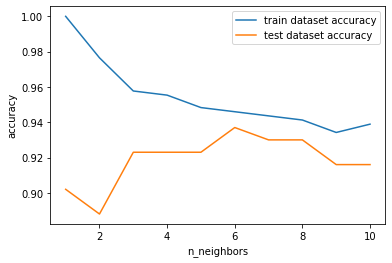

In [ ]:
 # coding: utf-8
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
#import mglearn <<< 이거.. 코랩에 설치가 안되어있는지 에러가 나서 찾아보니
#                   한 머신러닝 교과서 작가분께서 직접 만드신 라이브러리라고 합니다.
#                   제외해도 별다른 문제가 없는것 같길래 일단은 주석처리 하겠습니당.

cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# 1~10까지 이웃의 개수를 적용
neighbors_settings = range(1,11)

from sklearn.neighbors import KNeighborsClassifier #KNN을 위한 사이킷런의 머신러닝 라이브러리입니다.
for n_neighbors in neighbors_settings:
    # fit() 메서드는 self 객체를 반환합니다.
    # 객체 생성과 fit 메서드를 한줄에 쓸 수 있다고 합니다.
    # fit()을 사용하여 주어진 데이터에 우리가 원하는 함수 꼴로 Model을 fitting합니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

#각 데이터셋의 정확도를 한눈에 파악이 쉽도록 그래프로 출력해봅니다.
plt.plot(neighbors_settings, training_accuracy, label="train dataset accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test dataset accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()
# 이웃의 수가 늘어나면 모델은 단순해지고(덜 까다로워지므로) 훈련 데이터의 정확도는 줄어드는 양상을 보입니다.
# 이 경우 정확도가 가장 좋을 때는 중간 정도인 6개를 사용한 경우로, 92.98% 입니다.

이제 정규화(Normalisation) 작업을 추가하여 재도전 해보겠습니다. <br>
프로세스나 정확률에 차이가 있는지도 함께 지켜봐주세여.

# 0. 본격 예제 들어가기 전에 메서드나 모델에 대한 간단 설명입니다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#이제 KNeighborsClassifier 모델을 생성해야 하는데, 이 때 n_neighbors로 k를 정해줘야 합니다. 
#(그리고 x 데이터를 분류를 할 때 k개의 이웃 중 "거리가 가까운 이웃" 의 영향을 더 많이 받도록 가중치를 설정하려면 
#weights = "distance"를 지정해줄 수 있는데 여기서는 일단 생략하기로 합니다.)
classifier = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
# 그 다음 데이터를 .fit() 시켜줍니다. 
# x 데이터는 여러 개의 차원으로 이루어진 배열(점들의 집합)이 될 거고, 
# y 데이터는 레이블(각 점들의 분류 결과)가 됩니다. 
# 이 예제에서는 0 혹은 1로 분류될것입니다.
training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
training_labels = [0, 1, 1]
classifier.fit(training_points, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#이제 만약 새로운 값들을 분류하고 싶다면 .predict()를 사용하면 됩니다.
unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]
guesses = classifier.predict(unknown_points)

#1. 데이터, 라이브러리 임포트

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

In [ ]:
# 데이터 확인을 pandas의 데이터 프레임으로 바꿔서 해보겠습니다.
# .data를 찍어주면 데이터, .target을 찍어주면 레이블을 돌려줍니다.

import pandas as pd
df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)

# 데이터를 찍어보면 0과 1로 분류되어있는것을 확인해 볼 수 있습니다.
df_labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
# 그 0과 1 이 무엇을 의미하는 걸까요? 타켓 네임을 출력해보면
#아래와 같이 'malignant' =악성 'benign' =양성 인 것을 알 수 있습니다.
print(breast_cancer_data.target_names)

['malignant' 'benign']


In [ ]:
# 그러나 df.data에서 문제를 발견하게 됩니다.

df_data.head()

# 이름이나 칼럼같은것도 없이 그냥 30개 항목에 대한 값만 쭉 들어 있습니다.
# 그런데 값이 어떤 건 엄청 큰 거 같고(3번칼럼의 4번 로우는 1297.0로 매우 큼) 어떤 건 1이 채 안되는 것 같습니다...

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# 각 항목별로 최대/최소값을 비롯한 기초 통계량을 확인하기 위해 .describe()를 찍어봅니다.

df_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


역시. 최댓값 최솟값의 편차가 몹시 심합니다.
<br>항목마다 스케일이 너무나 다른데 그걸 무시한 채 동일한 정도로 학습에 반영하면 안 될 것 같습니다. 
<br>이때 사용하는 것이 정규화(Normalisation)라고 합니다.

In [ ]:
# 본 예제에서는 최소-최대 정규화 함수를 작성한 후

def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

In [ ]:
# df_data에 적용해 봅니다.
for x in range(len(df_data.columns)):
    df_data[x] = min_max_normalize(df_data[x])
df_data.describe()
# 모든 항목이 최소값은 0, 최대값은 1로 변환된 걸 확인할 수 있습니다.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,0.106345,0.189324,0.099376,0.062636,0.181119,0.174439,0.080540,0.223454,0.178143,0.100193,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,0.100421,0.121917,0.095267,0.084967,0.102067,0.134498,0.076227,0.116884,0.116316,0.091417,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,0.043781,0.104690,0.040004,0.020635,0.117483,0.081323,0.038106,0.144686,0.102409,0.046750,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,0.077023,0.165267,0.072092,0.033112,0.158650,0.136675,0.065379,0.207047,0.152643,0.079191,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,0.133044,0.246155,0.122509,0.071700,0.218683,0.226800,0.106187,0.278651,0.219480,0.126556,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2 데이터 세트 분리하기 (Training & Validation)
- 가지고 있는 데이터를 모두 사용해서 분류 모델을 만들 수도 있지만, <br>
지금은 실제로 생성한 분류 모델의 성능을 테스트를 해봐야 하니까 <br>
학습(training) 세트와 검증(validation) 세트를 분리해보겠습니다. <br>
- 모든 데이터에는 분류된 레이블(target)이 있으니, <br>
검증 데이터를 예측 모델에 넣어서 실제 그 레이블(정답)을 잘 맞추는지 보기 위함입니다.<br>
- 데이터 세트 분리는 사이킷런의 train_test_split을 통해 손쉽게 할 수 있습니다.
- 데이터 세트를 나누는 비율을 지정할 수도 있는데, 일반적으로 0.75:0.25, 즉 3:1이라고 합니다.

In [ ]:
from sklearn.model_selection import train_test_split
training_data, validation_data , training_labels, validation_labels = train_test_split(df_data, df_labels, test_size = 0.2, random_state = 100)

In [ ]:
# 나눠진 데이터 개수를 찍어봅시다.
print(len(training_data))
print(len(validation_data))
print(len(training_labels))
print(len(validation_labels))
# 455:144 대략 8:2로 분리된 걸 확인할 수 있습니다.

455
114
455
114


# 3 모델 생성하기
- 이제 학습 데이터를 가지고 모델을 생성할 것입니다. k=3으로 지정해봅니다.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

# 이제 위에서 나눠놓은 학습 데이터 세트(training_data, training_labels)로 학습시켜보겠습니다.
classifier.fit(training_data, training_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# 4 모델의 정확도(Accuracy) 평가하기

- 위에서 데이터 세트를 나눠놨기 때문에 학습시킨 모델을 바로 테스트 할 수 있습니다.
- 이때 당연히 검증 세트의 데이터와 레이블을 넣어줘야 합니다.
- KNeighborsClassifier에서는 .score()를 쓰면 모델의 정확도를 바로 확인할 수 있습니다.

In [ ]:
print(classifier.score(validation_data, validation_labels))

0.9649122807017544


k = 3 일때 정확도가 96.49%로 꽤 높게 측정되었습니다. <br>
이제 k 값이 정확도에 미치는 영향이 궁금해집니다. <br>
따라서 k = 1~100 로 적용하여 테스트 해보기로 합니다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

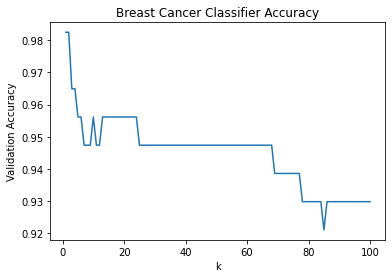

In [ ]:
import matplotlib.pyplot as plt
k_list = range(1,101)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(training_data, training_labels)
  accuracies.append(classifier.score(validation_data, validation_labels))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

- 먼저 노트, underfitting 은 모델이 학습 오류를 줄이지 못하는 상황을 의미하고, 오버피팅(overfitting)은 모델 학습 오류가 테스트 데이터의 오류보다 훨씬 작은 경우를 의미합니다.
- k가 커질수록 underfitting이 생겨서 정확도가 떨어지는 걸 확인할 수 있는데, 모델이 대충 대충 집어서 확인하게 되기 때문에 벌어지는 현상입니다.
- 어쨌든 적절한 k값을 찾아 분류 모델을 생성해주면 되겠습니다. 또한 이후에 .predict()로 레이블을 예측하는 것도 가능하겠습니다.

# 이제 Decision Tree 가 무엇인지 궁금해졌다고 가정하고 <br> 저희가 가진 데이터에 적용해 보기로 합니다.

- 의사결정 트리는 특정 항목에 대한 측정값을 목표가 되는 값에 매핑시켜주는 분석기법으로, 의사결정과정의 규칙을 이용해서 Tree 구조로 만든 분류모델 이라고 합니다.
- 제가 보기엔 스무고개랑 비슷한 매커니즘입니다.

In [ ]:
# 관련 라이브러리와 데이터 로드
import sklearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split 
import pydot #의사결정트리를 쉽게 시각화 할때 쓰는 아이라고 합니다. 궁금하니 사용해보기로 합니다.


# KNN예제를 따로 실행시키지 않아도 되도록 샘플 데이터 다시 로드.
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

# 훈련, 테스트 데이터 셔플하기
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify =  cancer.target, random_state = 42)
# 위에서 stratify ... 라고 하는 부분을 찾아보니 지정한 데이터의 비율을 유지해주는 아이라고 합니다.
# 만약 라벨셋인 y가 25%의  0과 75%의 1로 이루어진 바이너리 데이터셋일때
# stratify = y 로 설정하면 스플릿 된 데이터셋들도 0과 1이 각각 25%, 75%로
# 유지된 채 분할된다고 합니다. 유용하겠네요.

In [ ]:
#Decision Tree 선언하기
dTreeAll = DecisionTreeClassifier(random_state=0)

#훈련 (모든 리프 노드 사용해서 학습시키기)
dTreeAll.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#위 결과에 대해 모델 평가해보기
print("Train Set Score1 : {:.2f}".format(dTreeAll.score(X_train, y_train)))
print("Test Set Score1 : {}:.2f".format(dTreeAll.score(X_test, y_test)))

Train Set Score1 : 1.00
Test Set Score1 : 0.9370629370629371:.2f


- 트레인 셋의 점수가 1.00 인 당혹스런 현상에 대해서는 선생님께서 설명해주실 것입니다.
- 제가 참조한 예제에서 작가분께서는 깊이(Depth) 가 커지면 새로운 데이터를 적용하기가 곤란하고, 가장 중요한 단점인 예측 오차의 수치가 비약적으로 높아지는 경우가 있다고 합니다.

- 이럴 경우! 데이터 특성 파악하는 과정을 거친 후에 가지치기(pruning)를 활용하여 이 깊이를 조절해줄 필요성이 있다고 합니다.
- 여기서 가지치기의 감도 조절 또한 가능한데, reduced error pruning 또는 rule post pruning 등의 기법을 적용해 볼 수도 있다고 합니다.

In [ ]:
# 이제 의사결정 트리를 깊이를 제한하여 다시 선언해 보겠습니다.
dTreeLimit = DecisionTreeClassifier(max_depth=3, random_state=0)

# 그리고 다시 훈련.
dTreeLimit.fit(X_train, y_train)

# 점수를 출력해봅니다.
print("Train Set Score2 : {:.2f}".format(dTreeLimit.score(X_train, y_train)))
print("Test Set Score2 : {:.2f}".format(dTreeLimit.score(X_test, y_test)))

Train Set Score2 : 0.98
Test Set Score2 : 0.94


In [ ]:
# graphviz 의사결정트리 시각화 작업을 시작해봅니다.
export_graphviz(dTreeLimit, out_file="decisionTree1.dot", class_names=["malignant","benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

# 중요한 Encoding
(graph,) = pydot.graph_from_dot_file('decisionTree1.dot', encoding='utf8')

#Dot 파일을 Png 이미지로 저장
graph.write_png('decisionTree1.png')

# 뭔가 Files 에 저장이 되었습니다! 함께 확인해볼까요
# 해독하는 법은 선생님께서 설명해주실거죠? (찡긋)

# 이제 Perceptron을 이용한 예제입니다.

In [ ]:
# 도마와 칼, 재료를 준비해줍니다.
# 종종 보일 MLP는 Multi-Layer Perceptron이라고도 하는 다층 퍼셉트론의 약자입니다.

from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.datasets import load_breast_cancer


In [ ]:
cancer = load_breast_cancer()
# x축에 input 데이터 나열하고    
X=cancer.data  
 # y축에 타겟 데이터 나열해 줍니다.        
y=cancer.target             
# 훈련 데이터와 테스트 데이터로 쪼개줍니다. test_size=0.2이므로 8:2 비율입니다.
X_train_all, X_test, y_train_all, y_test = \
  train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)  
# 훈련 데이터와 검증 데이터 분류. val 이라고 하는 낯선아이가 등장했습니다. 
# 새로운 아이인줄 알았더니 모델 평가를 위해 얘를 사용할 모양입니다. 
# 그렇다면 validation의 약자인것 같습니다.
# 역시 8:2 비율입니다.
X_train, X_val, y_train, y_val = \
  train_test_split(X_train_all,y_train_all,stratify=y_train_all, \
                   test_size=0.2,random_state=42)  

In [ ]:
# scaler 라는 객체를 만들어서 사용할 것인데,
# StandardScaler 는 평균과 표준편차 사용해서 데이터 특성의 스케일을 맞춰줍니다.
scaler = StandardScaler()   
scaler.fit(X_train)

# 위의 scaler로 데이터를 표준화 전처리하는 과정입니다. 
# 구분짓기 위해 이름 뒤에 _scaled 표현도 넣어줍니다.
X_train_scaled = scaler.transform(X_train)  
X_val_scaled = scaler.transform(X_val)   

In [ ]:
# 이제 퍼셉트론 분류기를 사용하려나봅니다. 꺄륵.
# 길고 무서워보이는 이름 대신에 mlp라는 별명을 주어 사용하겠습니다.
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', \
                    solver='sgd', alpha=0.01, batch_size=32, \
                    learning_rate_init=0.1, max_iter=500)

- 활성화 함수로 로지스틱을 사용하였는데, 어쩐지 퍼셉트론 강의를 시작하기 전에 로지스틱 회귀 공부를 필수로 해야한다고 하더라구요. 그 이유를 아주 대충 정리해 보았습니다.
- 먼저 퍼셉트론의 애칭이 인공 신경망이던데 얘가 모티브로 한 실제 뉴런의 동작 모습을 정리해보면 이해가 빠르겠습니다.
- 실제 뉴런이 크게 둘로 나눈다면 Dendrite(수상돌기: 입력층, 다중일 수 있음) 과 Axon(축삭돌기: 출력층, only 하나) 이렇게 나눌 수 있습니다.
- 실제 뉴런에서는 세포에 입력된 다수의 입력이 하나로 합산되어 하나인 axon 으로 출력 되는데, 그 값이 각각 입/출력 이라 불리는 1(on 상태), 0(off 상태) 만 가능합니다.
- 이 입/출력을 함수로 나타낸 방식이 로지스틱 회귀와 매우 비슷하다는 것까지만 조사를 해 보았습니다.
- 로지스틱스가 단극 시그모이드 함수라면 양극성 시그모이드도 존재하겠습니다.(쌍곡탄젠트: -1 과 1 사이의 값을 가짐.) 흥미롭네요. (하하)
- solver 는 전에 정민님 예제에서 adam 으로 쓰였던걸 본 기억이 있는것 같습니다.
- 여기서 해결하지 못한 질문이 하나 생겼습니다. 알아보니 사이킷런에 구현되어있는 로지스틱의 기본 solver 값이 'lbfgs'라고 하던데...
- 저희 예제가 sgd를 사용한 특별한 의미가 있을까요? 둘 차이점이 분명히 있는것같은데 누구보다 빠르게 이해를 포기했습니다. ^^

In [ ]:
# 이제 훈련합니다.
mlp.fit(X_train_scaled, y_train)   
 #.score() 사용하여 정확도를 평가해봅니다.
mlp.score(X_val_scaled, y_val)

0.978021978021978